In [75]:
%reset

In [1]:
import numpy as np
from skimage.morphology import disk, dilation
from augment_annotation import augment_annotation
from load_annotation_data import load_annotation_data
import matplotlib.pyplot as plt
import os

In [2]:
# Pre - inputs
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model'
pthDL = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\04_19_2024'
pthim_ann = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\5x'
classcheck = 0
_, numann = load_annotation_data(pthDL, pth, pthim_ann,classcheck)

pthlabel = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\label'
pthim = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\im'
imnm = '00226.tif' #image names/idx differ from the ones in matlab, as the tiles are created in a random order
size_tile = 10200
imT = np.zeros((size_tile, size_tile), dtype=np.uint8)
pth = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model'

 
Importing annotation data...
Image 1 of 2: SG_013_0061
 annotation data previously loaded
Image 2 of 2: SG_014_0016
 annotation data previously loaded


In [3]:
import pandas as pd
numann_array = np.array(numann)
df_numann = pd.DataFrame(numann_array)
df_numann

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,15178.0,0.0,0.0,0.0,5368.0,0.0,0.0,0.0,0.0
1,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,64118.0,0.0,0.0,0.0,0.0
3,0.0,486.0,0.0,0.0,0.0,3314.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,6114.0,0.0,1265.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
298,0.0,0.0,881.0,0.0,0.0,3155.0,702.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.0,0.0,0.0,3016.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,58222.0,0.0,0.0,0.0,0.0
301,0.0,0.0,0.0,0.0,0.0,0.0,40035.0,0.0,0.0,0.0,0.0


In [4]:
# ________inputs of the function________
im = np.array(plt.imread(os.path.join(pthim, imnm)), dtype=np.float64)
print(f'im: {os.path.join(pthim, imnm)}')
TA = np.array(plt.imread(os.path.join(pthlabel, imnm)), dtype=np.float64)
print(f'TA: {os.path.join(pthlabel, imnm)}')
do_augmentation = True
class_id = 1
big_tile_size = imT.shape[0] 
print(f'big tile size: {big_tile_size}')
Shape_numann = 11
print(f'Shape Numann: {Shape_numann}')
num_pixels_class = np.zeros(Shape_numann, dtype=np.int32)
print(f'num_pixels_class: {num_pixels_class}')
kpall = 1

im: \\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\im\00226.tif
TA: \\10.99.68.52\Kiemendata\Valentina Matos\coda to python\test model\data\SG_014_0016\04_19_2024_boundbox\label\00226.tif
big tile size: 10200
Shape Numann: 11
num_pixels_class: [0 0 0 0 0 0 0 0 0 0 0]


Type TA:<class 'numpy.ndarray'>
Shape TA: (147, 102)
labels: [1 5 6 7]


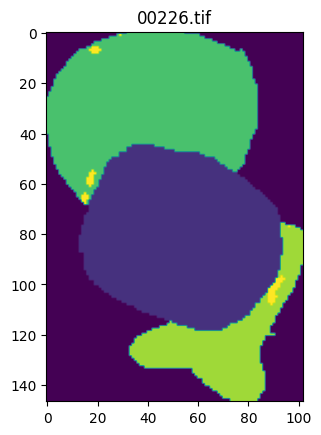

In [5]:
print(f'Type TA:{type(TA)}')
print(f'Shape TA: {TA.shape}')
labels = np.unique(TA)
labels = labels[1:].astype(int)
print(f'labels: {labels}')
plt.imshow(TA)
plt.title(imnm)
plt.show()


In [6]:
if do_augmentation:
    im, TA = augment_annotation(im, TA, 1, 1, 1, 1, 0)
else:
    im, TA = augment_annotation(im, TA, 1, 1, 0, 0, 0)

if kpall == 0:
    maxn = num_pixels_class[type]
    kp = num_pixels_class <= maxn * 1.05
else:
    kp = num_pixels_class >= 0


Type TA:<class 'numpy.ndarray'>
Shape TA: (93, 64)
labels: [1 5 6 7]


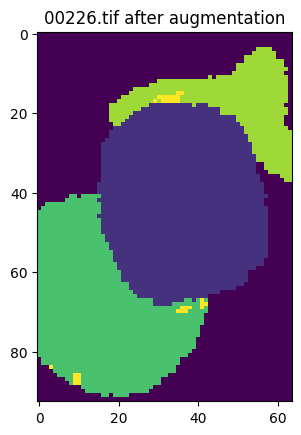

In [7]:
# Tina's BS
print(f'Type TA:{type(TA)}')
print(f'Shape TA: {TA.shape}')
labels = np.unique(TA)
labels = labels[1:].astype(int)
print(f'labels: {labels}')
plt.imshow(TA)
plt.title(imnm + ' after augmentation')
plt.show()

In [8]:
kp = np.concatenate(([0], kp))
tmp = kp[TA.astype(int)] 

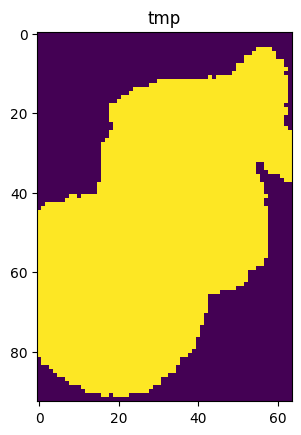

In [9]:
#Tina's BS
plt.imshow(tmp)
plt.title('tmp')
plt.show()

In [10]:
dil = np.random.randint(15) + 15
print(f'dil: {dil}')

dil: 24


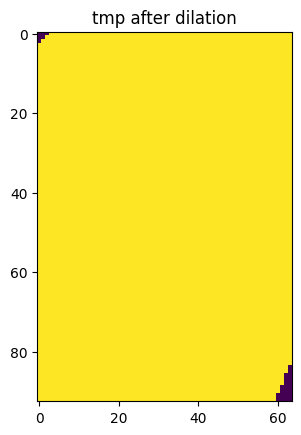

In [11]:
tmp = dilation(tmp, disk(dil))
#Tina's BS
plt.imshow(tmp)
plt.title('tmp after dilation')
plt.show()

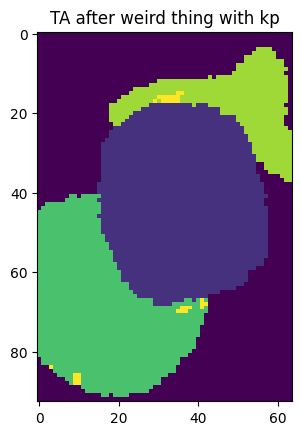

In [12]:
TA = TA * tmp
for i in range(im.shape[2]):
    im[:,:,i] *= tmp
#Tina's BS
plt.imshow(TA)
plt.title('TA after weird thing with kp')
plt.show()

In [13]:
p1 = min([big_tile_size, TA.shape[0]])
p2 = min([big_tile_size, TA.shape[1]])

In [14]:
# Crop both the image and the label mask to the specified dimensions (p1, p2)
im = im[0:p1, 0:p2, :]
TA = TA[0:p1, 0:p2]

In [15]:

#return variables
im = im.astype(np.uint8)
TA = TA.astype(np.uint8)

kpout = np.unique(TA)
kpout = kpout[1:]

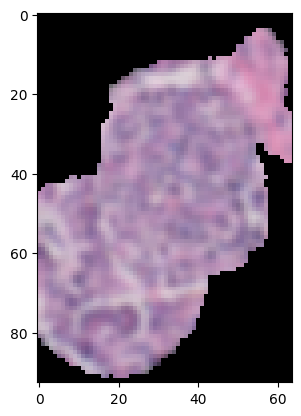

In [17]:
plt.imshow(im)

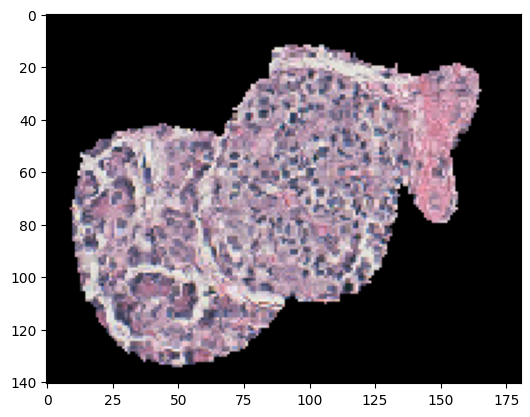

In [18]:
pthim = r'\\10.99.68.52\Kiemendata\Valentina Matos\coda to python\variables\im_output_edit_tiles.tif'
image = plt.imread(pthim)
plt.imshow(image)